In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df_orig = pd.read_csv('Mall_Customers.csv')

In [3]:
df = df_orig.copy()

In [4]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
# Spending Score is something you assign to the customer
# based on your defined parameters like customer behavior and purchasing data.

In [6]:
# do some EDA and see interesting things about features

In [7]:
#split up the ages into groups

In [8]:
pd.DataFrame(pd.cut(df['Age'], bins=12).value_counts())

,Age
"(26.667, 31.0]",30
"(31.0, 35.333]",28
"(17.948, 22.333]",25
"(35.333, 39.667]",18
"(44.0, 48.333]",17
"(48.333, 52.667]",16
"(39.667, 44.0]",15
"(22.333, 26.667]",15
"(65.667, 70.0]",12
"(52.667, 57.0]",10


In [9]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


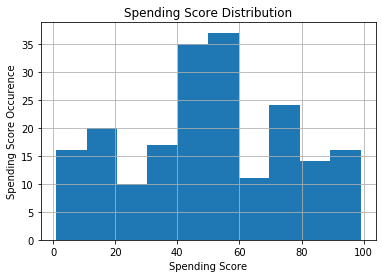

In [10]:
# See Spending Distribution
df['Spending Score (1-100)'].hist();
plt.title('Spending Score Distribution');
plt.ylabel('Spending Score Occurence');
plt.xlabel('Spending Score');

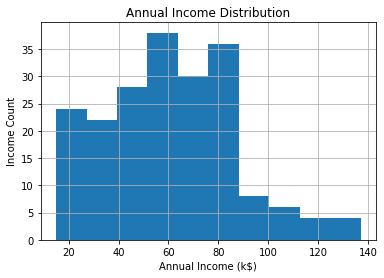

In [11]:
# See income Distribution
df['Annual Income (k$)'].hist();
plt.title('Annual Income Distribution');
plt.ylabel('Income Count');
plt.xlabel('Annual Income (k$)');

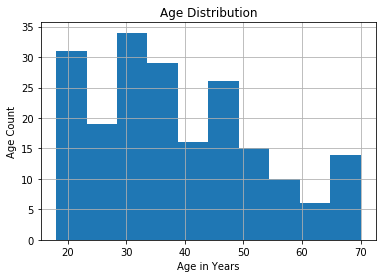

In [12]:
# See age distribution
df['Age'].hist()
plt.title('Age Distribution');
plt.ylabel('Age Count');
plt.xlabel('Age in Years');

In [13]:
# Check to see if there is an imbalance
df['Gender'].value_counts(True)

Female    0.56
Male      0.44
Name: Gender, dtype: float64

In [14]:
# see how many records are in the dataset
df.shape

(200, 5)

In [15]:
# There are only 200 records in the dataset
# see the customer age range
df.sort_values(by = 'Age',ascending=True)
# The customer age range is from 18-70

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
114,115,Female,18,65,48
91,92,Male,18,59,41
65,66,Male,18,48,59
33,34,Male,18,33,92
0,1,Male,19,15,39
162,163,Male,19,81,5
138,139,Male,19,74,10
115,116,Female,19,65,50
113,114,Male,19,64,46
111,112,Female,19,63,54


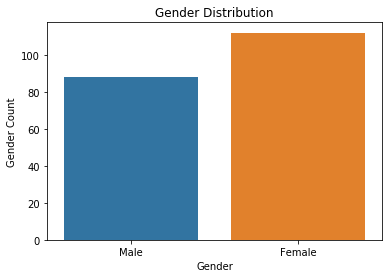

In [16]:
sns.countplot(x='Gender', data=df);
plt.title('Gender Distribution');
plt.ylabel('Gender Count');

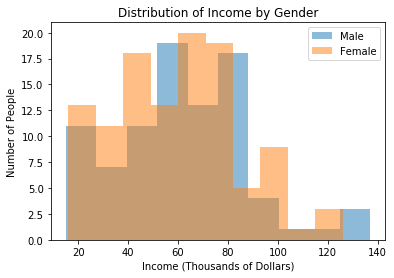

In [17]:
plt.hist('Annual Income (k$)', data=df[df['Gender'] == 'Male'], alpha=0.5, label='Male');
plt.hist('Annual Income (k$)', data=df[df['Gender'] == 'Female'], alpha=0.5, label='Female');
plt.title('Distribution of Income by Gender');
plt.xlabel('Income (Thousands of Dollars)');
plt.ylabel('Number of People')
plt.legend();

In [18]:
# Group by age and see the average spending score
avg_age_spd_scr = df.groupby(['Age','Gender','Spending Score (1-100)']).agg({'Annual Income (k$)':'mean'}).reset_index()

In [19]:
avg_age_spd_scr.head()

,Age,Gender,Spending Score (1-100),Annual Income (k$)
0,18,Female,48,65.0
1,18,Male,41,59.0
2,18,Male,59,48.0
3,18,Male,92,33.0
4,19,Female,50,65.0


In [20]:
avg_age_spd_scr[avg_age_spd_scr['Gender'] == "Female"]

,Age,Gender,Spending Score (1-100),Annual Income (k$)
0,18,Female,48,65.0
4,19,Female,50,65.0
5,19,Female,54,63.0
12,20,Female,6,16.0
13,20,Female,75,37.0
17,21,Female,42,62.0
18,21,Female,57,54.0
19,21,Female,73,30.0
20,21,Female,81,33.0
22,22,Female,55,57.0


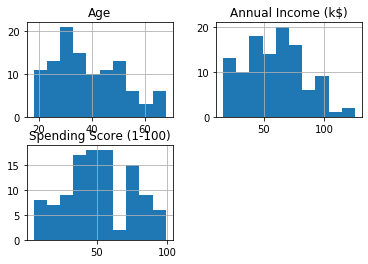

In [21]:
avg_age_spd_scr[avg_age_spd_scr['Gender'] == "Female"].hist();

In [22]:
avg_age_spd_scr.Age.mean()

38.857142857142854

In [23]:
avg_age_spd_scr['Spending Score (1-100)'].mean()

50.13775510204081

In [24]:
df['Spending Score (1-100)'].mean()

50.2

In [25]:
avg_age_spd_scr[avg_age_spd_scr['Gender']=='Male'].shape

(87, 4)

In [26]:
males_grouped = avg_age_spd_scr[avg_age_spd_scr['Gender']=='Male']
females_grouped = avg_age_spd_scr[avg_age_spd_scr['Gender']=='Female']

In [27]:
males_grouped.head()

,Age,Gender,Spending Score (1-100),Annual Income (k$)
1,18,Male,41,59.0
2,18,Male,59,48.0
3,18,Male,92,33.0
6,19,Male,5,81.0
7,19,Male,10,74.0


In [28]:
males_avg_spend_score = males_grouped.groupby(['Annual Income (k$)','Age']).agg({'Spending Score (1-100)':'mean'}).reset_index()

In [29]:
males_avg_spend_score.head()

,Annual Income (k$),Age,Spending Score (1-100)
0,15.0,19,39.0
1,15.0,21,81.0
2,19.0,64,3.0
3,19.0,67,14.0
4,20.0,22,79.0


In [30]:
females_avg_spend_score = females_grouped.groupby(['Annual Income (k$)','Age']).agg({'Spending Score (1-100)':'mean'}).reset_index()

In [31]:
females_avg_spend_score.head()

,Annual Income (k$),Age,Spending Score (1-100)
0,16.0,20,6.0
1,16.0,23,77.0
2,17.0,22,76.0
3,17.0,31,40.0
4,18.0,23,94.0


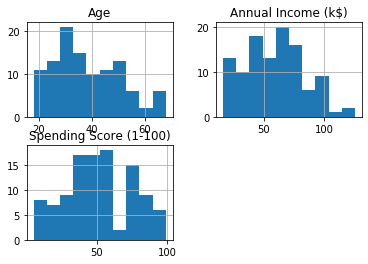

In [32]:
females_avg_spend_score.hist();

In [33]:
females_avg_spend_score.shape

(108, 3)

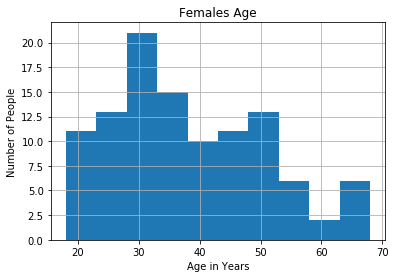

In [34]:
females_avg_spend_score.Age.hist();
plt.title('Females Age');
plt.xlabel('Age in Years');
plt.ylabel('Number of People');

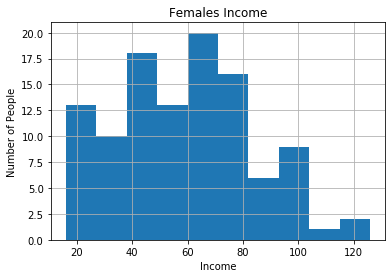

In [35]:
females_avg_spend_score['Annual Income (k$)'].hist();
plt.title('Females Income');
plt.xlabel('Income');
plt.ylabel('Number of People');

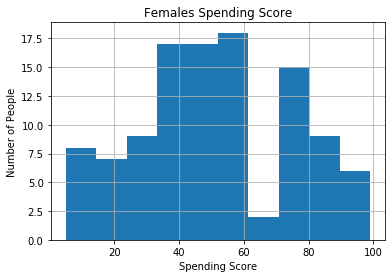

In [36]:
females_avg_spend_score['Spending Score (1-100)'].hist();
plt.title('Females Spending Score');
plt.xlabel('Spending Score');
plt.ylabel('Number of People');

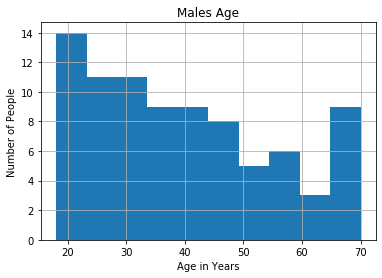

In [37]:
males_avg_spend_score.Age.hist();
plt.title('Males Age');
plt.xlabel('Age in Years');
plt.ylabel('Number of People');

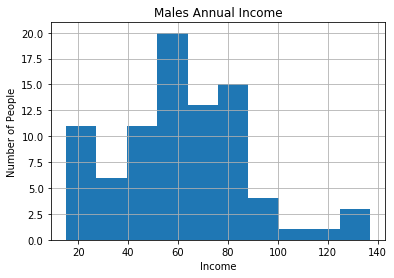

In [38]:
males_avg_spend_score['Annual Income (k$)'].hist();
plt.title('Males Annual Income');
plt.xlabel('Income');
plt.ylabel('Number of People');

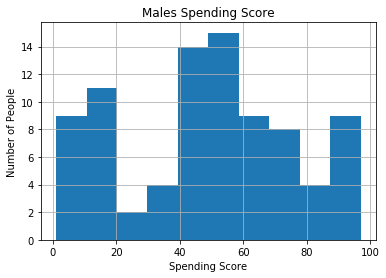

In [39]:
males_avg_spend_score['Spending Score (1-100)'].hist();
plt.title('Males Spending Score');
plt.xlabel('Spending Score');
plt.ylabel('Number of People');

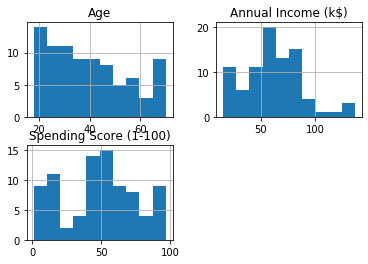

In [40]:
males_avg_spend_score.hist();

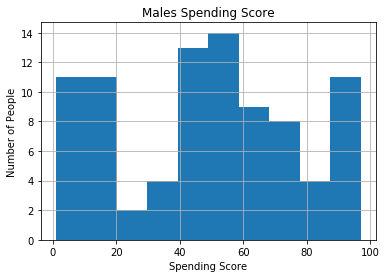

In [41]:
males_grouped['Spending Score (1-100)'].hist();
plt.title('Males Spending Score');
plt.xlabel('Spending Score');
plt.ylabel('Number of People');

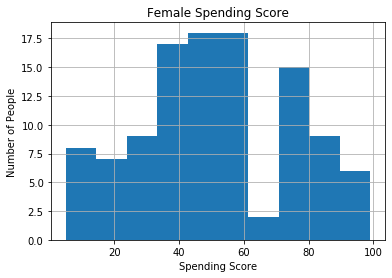

In [42]:
females_grouped['Spending Score (1-100)'].hist();
plt.title('Female Spending Score');
plt.xlabel('Spending Score');
plt.ylabel('Number of People');
# we can see that female spending score is more normal than males.
#Possibly means women buy more items and shop more frequently

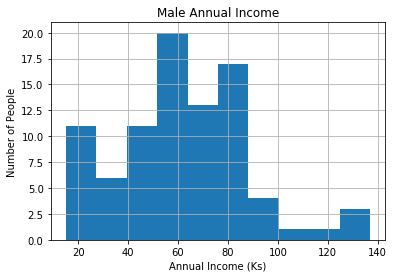

In [43]:
males_grouped['Annual Income (k$)'].hist()
plt.title('Male Annual Income');
plt.xlabel('Annual Income (Ks)');
plt.ylabel('Number of People');

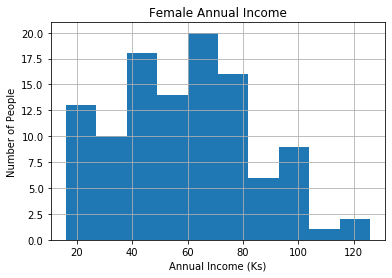

In [44]:
females_grouped['Annual Income (k$)'].hist()
plt.title('Female Annual Income');
plt.xlabel('Annual Income (Ks)');
plt.ylabel('Number of People');

In [45]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [46]:
# Find a way to bin the ages

In [47]:
age_bins = [18,27,36,45,54,63,72,80]
df['binned'] = pd.cut(df['Age'], age_bins)
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),binned
0,1,Male,19,15,39,"(18, 27]"
1,2,Male,21,15,81,"(18, 27]"
2,3,Female,20,16,6,"(18, 27]"
3,4,Female,23,16,77,"(18, 27]"
4,5,Female,31,17,40,"(27, 36]"


In [48]:
df['binned'].value_counts().sort_values()

(72, 80]     0
(63, 72]    15
(54, 63]    15
(36, 45]    30
(45, 54]    36
(18, 27]    42
(27, 36]    58
Name: binned, dtype: int64

In [49]:
bins_score = df.groupby('binned').agg({'Spending Score (1-100)':'mean'}).reset_index()

In [50]:
bins_score.head()

,binned,Spending Score (1-100)
0,"(18, 27]",55.214286
1,"(27, 36]",63.982759
2,"(36, 45]",43.300000
3,"(45, 54]",36.111111
4,"(54, 63]",34.266667


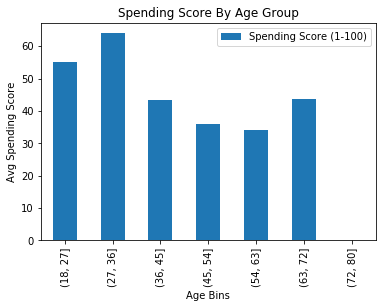

In [51]:
bins_score.plot.bar(x='binned',y='Spending Score (1-100)');
plt.title('Spending Score By Age Group');
plt.xlabel('Age Bins');
plt.ylabel('Avg Spending Score');

In [52]:
df.Age.max()

70

In [53]:
# divide the spending score by income and age

In [54]:
df['newcol'] = df['Annual Income (k$)']/df['Spending Score (1-100)']

In [55]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),binned,newcol
0,1,Male,19,15,39,"(18, 27]",0.384615
1,2,Male,21,15,81,"(18, 27]",0.185185
2,3,Female,20,16,6,"(18, 27]",2.666667
3,4,Female,23,16,77,"(18, 27]",0.207792
4,5,Female,31,17,40,"(27, 36]",0.425000


In [56]:
df['Spending Score (1-100)'].value_counts()

42    8
55    7
46    6
73    6
35    5
52    5
59    5
48    5
75    5
50    5
40    4
56    4
5     4
47    4
41    4
14    4
13    3
51    3
60    3
49    3
43    3
92    3
88    3
54    3
15    3
17    3
77    3
39    2
16    2
36    2
     ..
61    2
58    2
18    1
9     1
8     1
11    1
12    1
7     1
94    1
3     1
89    1
53    1
27    1
85    1
68    1
98    1
63    1
65    1
66    1
45    1
44    1
71    1
22    1
78    1
34    1
31    1
82    1
24    1
23    1
99    1
Name: Spending Score (1-100), Length: 84, dtype: int64

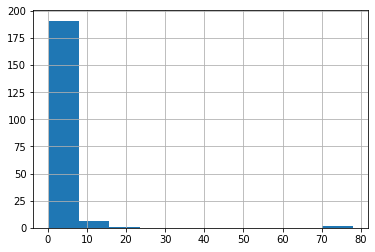

In [57]:
df.newcol.hist()

In [58]:
# make a new feature that divides income by spending score 

In [59]:
import seaborn as sns

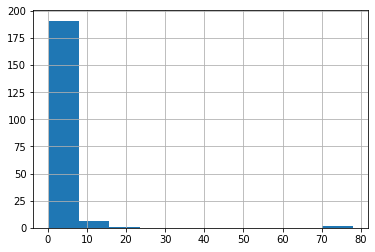

In [60]:
df['newcol'].hist()

In [61]:
everything = df.groupby(['Annual Income (k$)','Age','Gender','binned']).agg({'Spending Score (1-100)':'mean'}).reset_index()

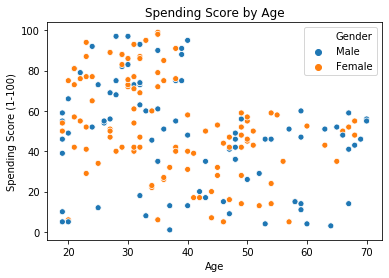

In [62]:
sns.scatterplot(data=everything, x='Age',y='Spending Score (1-100)',hue='Gender');
plt.title('Spending Score by Age');

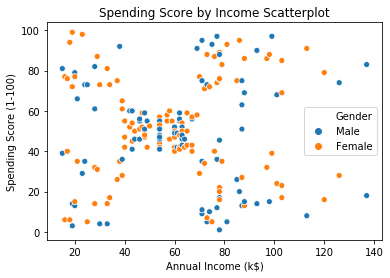

In [63]:
sns.scatterplot(data=everything, x='Annual Income (k$)',y='Spending Score (1-100)',hue='Gender');
plt.title('Spending Score by Income Scatterplot');

In [64]:
males_everything = everything[everything['Gender']=='Male']

In [65]:
females_everything = everything[everything['Gender']=='Female']

In [66]:
females_everything_g = females_everything.groupby(['Annual Income (k$)','Age','binned']).agg({'Spending Score (1-100)':'mean'}).reset_index()

In [67]:
males_everything_g = males_everything.groupby(['Annual Income (k$)','Age','binned']).agg({'Spending Score (1-100)':'mean'}).reset_index()

In [68]:
males_everything_g.shape

(83, 4)

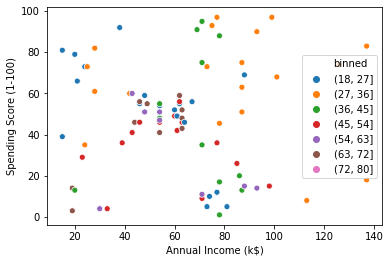

In [69]:
sns.scatterplot(data=males_everything_g, x='Annual Income (k$)',y='Spending Score (1-100)',hue='binned')

In [70]:
males_everything_g.sort_values(by='Spending Score (1-100)', ascending=False)

,Annual Income (k$),Age,binned,Spending Score (1-100)
77,99,30,"(27, 36]",97.0
59,77,28,"(27, 36]",97.0
50,71,40,"(36, 45]",95.0
57,75,32,"(27, 36]",93.0
15,38,24,"(18, 27]",92.0
47,69,39,"(36, 45]",91.0
74,93,35,"(27, 36]",90.0
63,78,39,"(36, 45]",88.0
81,137,30,"(27, 36]",83.0
11,28,29,"(27, 36]",82.0


In [71]:
# get avg income by age bins
males_everything_g.groupby('binned').agg({'Spending Score (1-100)':'mean'}).reset_index()

,binned,Spending Score (1-100)
0,"(18, 27]",50.368421
1,"(27, 36]",65.605263
2,"(36, 45]",48.153846
3,"(45, 54]",34.357143
4,"(54, 63]",31.625000
5,"(63, 72]",41.700000
6,"(72, 80]",NaN


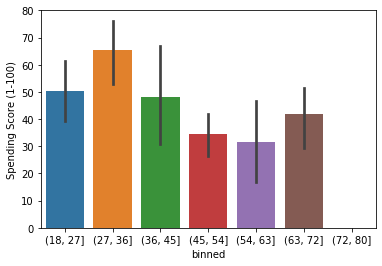

In [72]:
sns.barplot(data=males_everything_g,x='binned',y='Spending Score (1-100)');

In [73]:
females_everything_g.groupby('binned').agg({'Spending Score (1-100)':'mean'}).reset_index()

,binned,Spending Score (1-100)
0,"(18, 27]",59.217391
1,"(27, 36]",63.680556
2,"(36, 45]",39.588235
3,"(45, 54]",37.227273
4,"(54, 63]",34.750000
5,"(63, 72]",48.000000
6,"(72, 80]",NaN


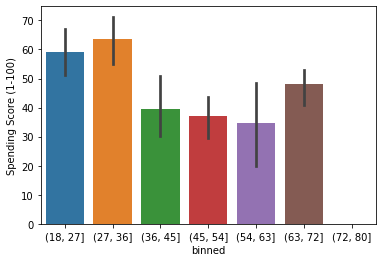

In [74]:
sns.barplot(data=females_everything_g,x='binned',y='Spending Score (1-100)');

In [75]:
df.groupby(['Annual Income (k$)','Age','binned']).agg({'Spending Score (1-100)':'mean'}).reset_index()

,Annual Income (k$),Age,binned,Spending Score (1-100)
0,15,19,"(18, 27]",39.0
1,15,21,"(18, 27]",81.0
2,16,20,"(18, 27]",6.0
3,16,23,"(18, 27]",77.0
4,17,22,"(18, 27]",76.0
5,17,31,"(27, 36]",40.0
6,18,23,"(18, 27]",94.0
7,18,35,"(27, 36]",6.0
8,19,30,"(27, 36]",72.0
9,19,35,"(27, 36]",99.0


In [76]:
gender_key = {'Male':0,'Female':1}

In [77]:
df['Gender'] = [gender_key[value] for value in df.Gender]

In [78]:
df = df.drop('binned',axis=1)

# Start cleaning Notebook From Here

In [79]:
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist

In [80]:
kmean_model = KMeans(n_clusters=3, random_state=42)

In [81]:
kmean_model.fit(df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

In [87]:
cluster_assignments = kmean_model.predict(df)

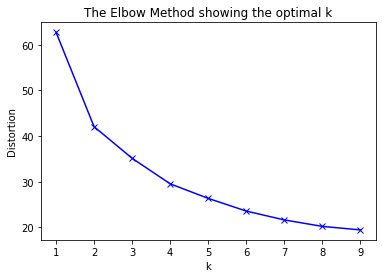

In [88]:
distortions = []
K = range(1,10)
for k in K:
    kmean_model = KMeans(n_clusters=k).fit(df)
    kmean_model.fit(df)
    distortions.append(sum(np.min(cdist(df, kmean_model.cluster_centers_, 'euclidean'), axis=1)) / df.shape[0])

# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [89]:
from sklearn.metrics import calinski_harabasz_score

In [ ]:
# This is the variance ratio

In [92]:
print(calinski_harabasz_score(df, cluster_assignments))

251.74551998008027


In [85]:
df.shape

(200, 6)

In [94]:
cluster_assignments.shape

(200,)

In [95]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),newcol
0,1,0,19,15,39,0.384615
1,2,0,21,15,81,0.185185
2,3,1,20,16,6,2.666667
3,4,1,23,16,77,0.207792
4,5,1,31,17,40,0.425000


In [97]:
df = df.drop('newcol',axis=1)

In [98]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,0,19,15,39
1,2,0,21,15,81
2,3,1,20,16,6
3,4,1,23,16,77
4,5,1,31,17,40
